# Introduction to Colab

The objective of this tutorial is to introduce  useful commands and examples for OpenCV in Colab.
Colab is a Python development environment like jupyter notebook, it can run in the browser using Google Cloud.


## Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

## Code cells
Below is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.


## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).

In [ ]:
!python -V

In [ ]:
!nvidia-smi

In [ ]:
!pip install numpy

# Basic function with OpenCV

In [ ]:
# related library
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
# upload folder from google drive
from google.colab import drive
drive.mount('/content/drive')

### 1.load picture

In [ ]:
img = cv2.imread('/content/drive/My Drive/opencv_photo/cat.jpg')

### 2.Show image

In [ ]:
cv2_imshow(img)

### 3.Convert image to grayscale


In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

### 4.Filter

In [ ]:
img = cv2.imread('/content/drive/My Drive/opencv_photo/exercise.jpg')
cv2_imshow(img)

cv2.inRange()：​If the pixel which rgb or hsv values  between  the lower and upper ,then convert this pixel’s rgb to 255 255 255,else convert to 0 0 0.

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# red
lower = np.array([0, 50, 50])
upper = np.array([180, 255, 255])
mask= cv2.inRange(hsv,lower,upper)

mask_result = cv2.bitwise_and (img, img, mask=mask)
cv2_imshow(mask_result)

### 5.Find and draw contours

cv2.findContours(), the first argument is binary image that you want to find its contours, that is, black and white (not a grayscale image).

The second argument indicates the contour retrieval mode, like cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE. 

The final parameter is the approximate method of contour, such as cv2.CHAIN_APPROX_NONE, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_TC89_L1, CV_CHAIN_APPROX_TC89_KCOS.

The cv2.findContours() function returns two values, one is the contour itself, and the other is the attribute corresponding to each contour.

cv2.drawContours(), the first is to specify which image to draw the outline on.

The second argument is the contour itself, which stored a list in Python.

The third parameter specifies which contour in the contour list to draw, if it is -1, draw all contours in it.

The fourth parameter is color of the contours.

The last argument is thickness of the contours.


In [ ]:
( contours,_) = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img,contours,-1,(0,255,0),10)

cv2_imshow(img)

### 6.Shape detection

cv2.approxPolyDP(), the first argument is input point set.

The second argument is the specified precision, that is, the maximum distance between the original curve and the approximate curve.

The final argument means that whether the approximate curve is closed or not.

The output is approximated result.

cv2.putText(), the argument is which picture you want to put text, the text, its position, font format, size of font, color of font and thickness of font.

In [ ]:
for cnt in contours:

  epsilon = 0.04 * cv2.arcLength(cnt, True)
  app = cv2.approxPolyDP(cnt, epsilon, True)

  if(len(app) == 3):
    obj_shape = "triangle"
  elif(len(app) == 4):
    obj_shape = "square"
  else:
    obj_shape = "circle"

  font = cv2.FONT_HERSHEY_SIMPLEX
  x_str, y_str = app[0][0]
  if obj_shape == "triangle":
    cv2.putText(img, obj_shape, (x_str, y_str), font, 5,
                        (0, 0, 0), 2)
  elif obj_shape == "square":
    cv2.putText(img, obj_shape, (x_str, y_str), font, 5,
                        (0, 0, 0), 2)
  elif obj_shape == "circle":
    cv2.putText(img, obj_shape, (x_str, y_str), font, 5,
                        (0, 0, 0), 2)
cv2_imshow(img)

# Task



Students should do this by themselves

This task, you need to show shapes.jpg, filter four colors, detect objects and draw it contours by using the same method as tutorial. 

Expected result like below picture.

Show the shapes.jpg.

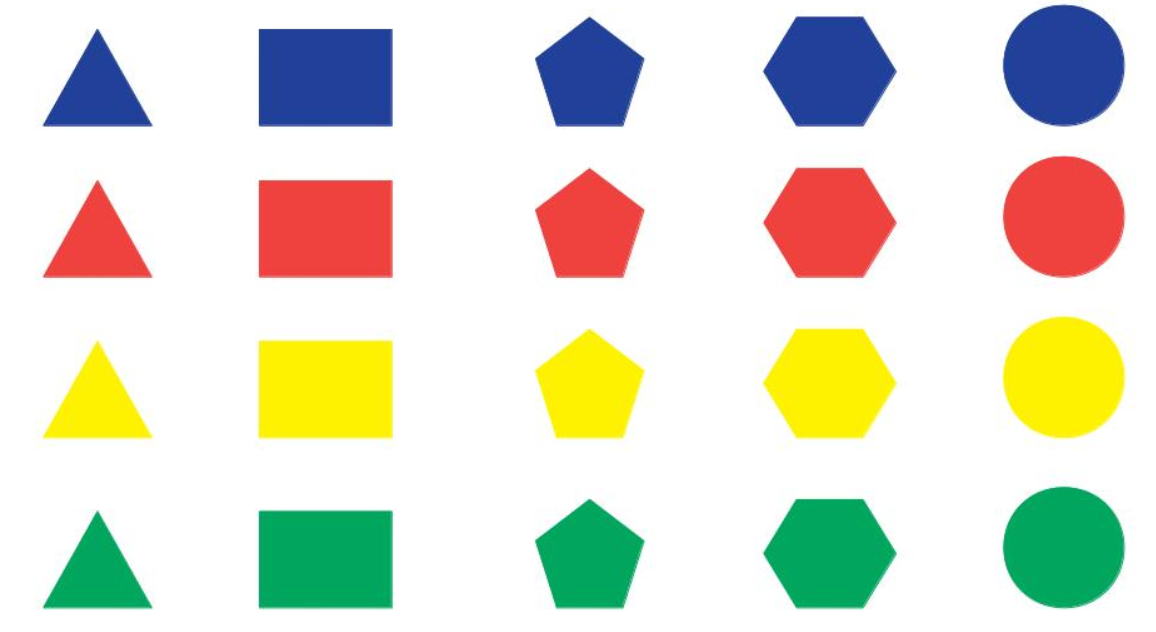

Filter four colors.

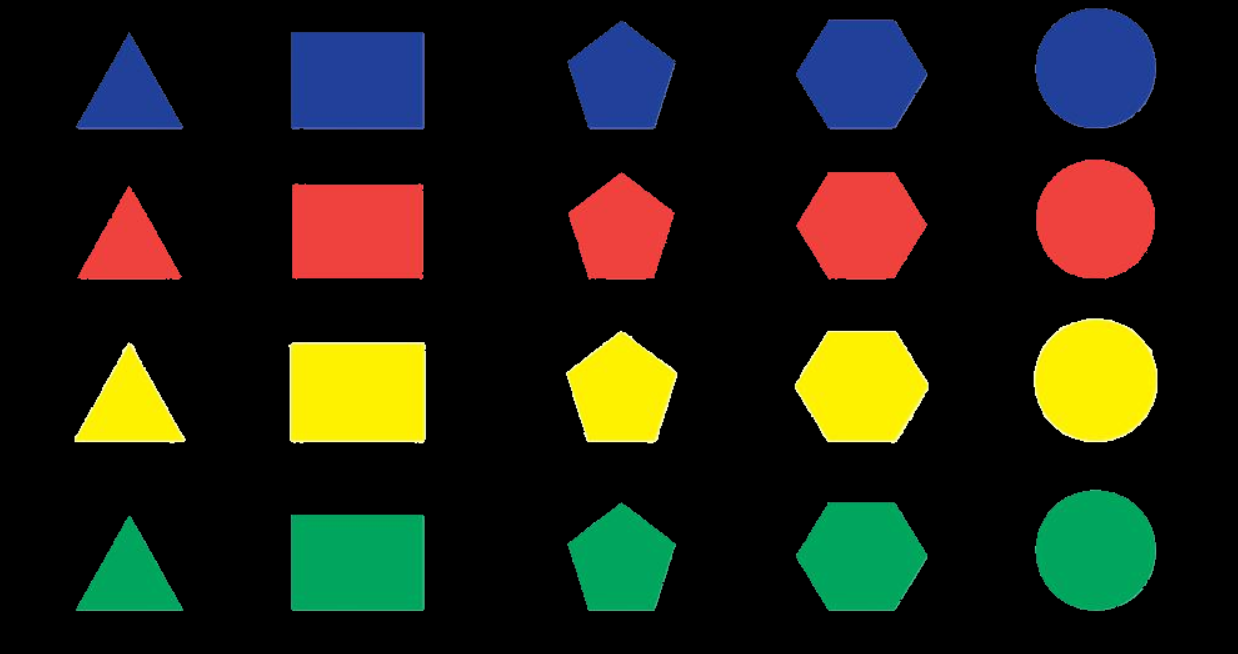

Edge detection.

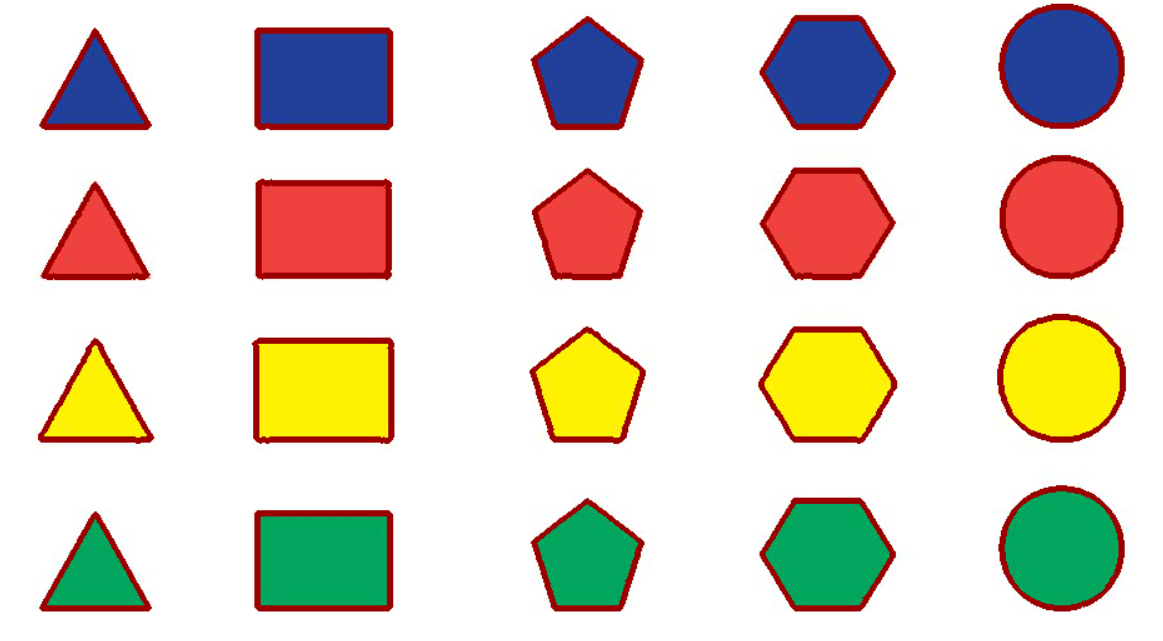

Shape detection.

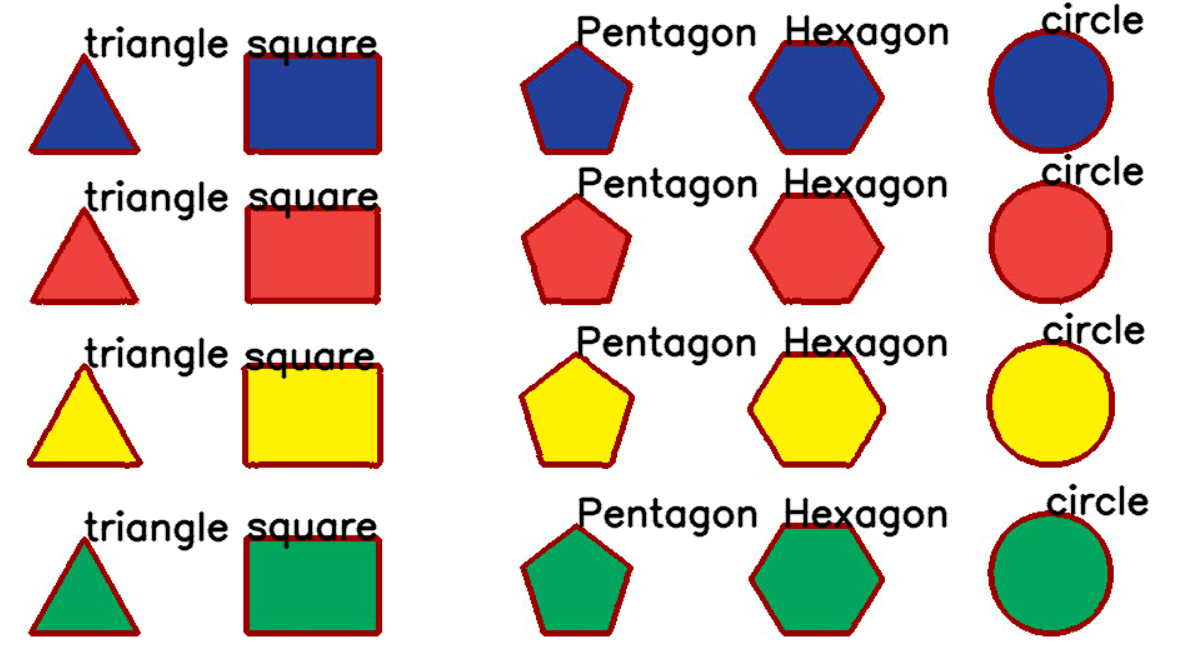